# **Getting Started with ChemPlot**

<h>**Installation**
<p> Currenty to install ChemPlot, first install RDkit (a library for cheminiformatics). Then using pip you can install ChemPlot.

In [ ]:
# Install RDkit
!pip install rdkit
!pip install chemplot==1.2.0
!pip install bokeh==2.4.3

In [18]:
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

<h>**Import the library and the Example Datasets**
<p>Let's start by importing ChemPlot and two example datasets to demonstrate its the functionalities. We the following datasets: BBBP (blood-brain barrier penetration) [1] and SAMPL (Hydration free energy)  [2] dataset. The target of the BBBP dataset is discrete while the target for the SAMPL dataset is continuos.

---
<p>[1] Martins, Ines Filipa, et al. (2012). A Bayesian approach to in silico blood-brain barrier penetration modeling. Journal of chemical information and modeling 52.6, 1686-1697
<p>[2] Mobley, David L., and J. Peter Guthrie. "FreeSolv: a database of experimental and calculated hydration free energies, with input files." Journal of computer-aided molecular design 28.7 (2014): 711-720.

In [2]:
from chemplot import load_data, Plotter

data_BBBP = load_data("BBBP")
data_SAMPL = load_data("SAMPL")

2024-12-17 15:32:55.601013: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-17 15:32:55.887131: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-17 15:32:56.008238: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-17 15:32:56.041192: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-17 15:32:56.301993: I tensorflow/core/platform/cpu_feature_guar

In [3]:
smiles_list = data_BBBP["smiles"].tolist()
target_values = data_BBBP["target"].tolist()

In [8]:
plotter = Plotter.from_smiles(smiles_list,
                             target=target_values,
                             target_type="C",
                             sim_type="tailored",
                             fp_type="mordred",
                             feature_selection="mutual_info")

[15:35:52] WARNING: not removing hydrogen atom without neighbors
[15:35:52] WARNING: not removing hydrogen atom without neighbors
[15:35:52] WARNING: not removing hydrogen atom without neighbors
[15:35:52] WARNING: not removing hydrogen atom without neighbors
[15:35:52] WARNING: not removing hydrogen atom without neighbors
[15:35:52] WARNING: not removing hydrogen atom without neighbors
[15:35:52] WARNING: not removing hydrogen atom without neighbors
[15:35:52] WARNING: not removing hydrogen atom without neighbors
[15:35:53] WARNING: not removing hydrogen atom without neighbors
[15:35:53] WARNING: not removing hydrogen atom without neighbors
[15:35:53] WARNING: not removing hydrogen atom without neighbors
[15:35:53] WARNING: not removing hydrogen atom without neighbors
[15:35:53] WARNING: not removing hydrogen atom without neighbors
[15:35:53] WARNING: not removing hydrogen atom without neighbors
[15:35:53] WARNING: not removing hydrogen atom without neighbors
[15:35:53] WARNING: not r

For the following SMILES not all descriptors can be computed:
[N+](=[N-])=O.
These SMILES will be removed from the data.


In [9]:
tsne_df = plotter.tsne(random_state=0, pca=True)
tsne_df.head()

,t-SNE-1,t-SNE-2,target
0,6.956925,25.031809,1
1,-0.435698,-7.943913,1
2,19.782982,-11.285918,1
3,-5.877983,-6.978579,1
4,27.205688,47.811409,1


<Axes: label='scatter', title={'center': 't-SNE plot'}, xlabel='t-SNE-1', ylabel='t-SNE-2'>

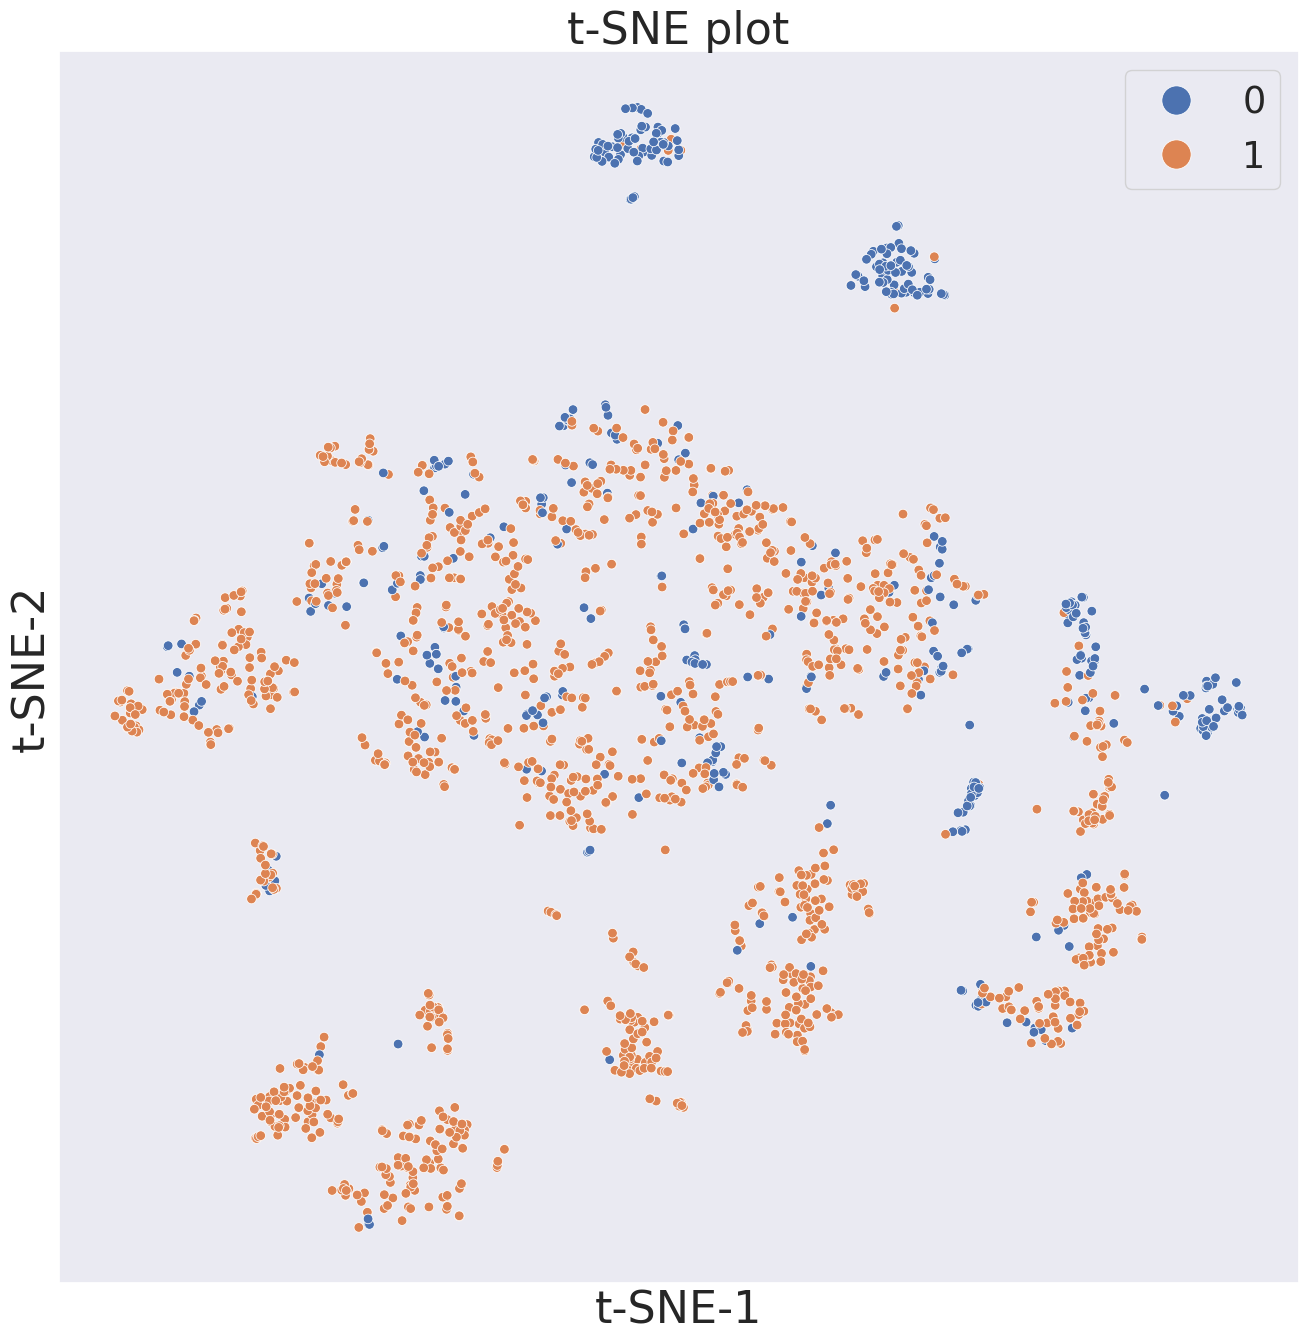

In [10]:
plotter.visualize_plot(
    size=16,
)

In [ ]:
from bokeh.io import output_notebook
output_notebook()

plotter.interactive_plot(
    size=800,
    show_plot=True);

Let's explore the BBBP dataset.

In [ ]:
data_BBBP

Let's explore the SAMPL dataset.

In [ ]:
data_SAMPL

<h>**Plotting the Datasets**
<p>We can now use the library to create some plots. Let's compare the scatter plot for BBBP with the plots describing the distribuition of the chemical space.

Create a Plotter object

In [ ]:
cp_BBBP = Plotter.from_smiles(data_BBBP["smiles"], target=data_BBBP["target"], target_type="C")

Reduce the dimensions of the molecular descriptors

In [ ]:
cp_BBBP.tsne(random_state=0)

Compare "scatter", "hex" and "kde" plots

In [ ]:
cp_BBBP.visualize_plot(kind="scatter", size=8)
cp_BBBP.visualize_plot(kind="hex", size=8)
cp_BBBP.visualize_plot(kind="kde", size=8);

<h>**Clustering**
<p>It is also possible to cluster data before plotting. You can control number of cluster with the parameter *n_clusters* default value is 5

In [ ]:
cp_BBBP.cluster(n_clusters=6)
cp_BBBP.visualize_plot(size=8,clusters=True)

Let's now do the same for a dataset with a continuos target like SAMPL. Create a Plotter object

In [ ]:
cp_SAMPL = Plotter.from_smiles(data_SAMPL["smiles"], target=data_SAMPL["target"], target_type="R")

Reduce the dimensions of the molecular descriptors

In [10]:
cp_SAMPL.tsne(random_state=0);

Scatter Plot for SAMPL dataset.

In [ ]:
cp_SAMPL.visualize_plot(size=8, colorbar=True);

<h>**Comparing the dimensionality reduction methods**
<p>We will try know to see how different are the plots generated by PCA, t-SNE and UMAP.

Inspect BBBP and compare "PCA", "t-SNE" and "UMAP" plots.

In [ ]:
cp_BBBP.pca()
cp_BBBP.visualize_plot(size=8);
cp_BBBP.tsne()
cp_BBBP.visualize_plot(size=8);
cp_BBBP.umap()
cp_BBBP.visualize_plot(size=8);

**t-SNE perplexity value**
<p>Change the perplexity to obtain plots with smaller or bigger clusters. The adequate value for perplexity is however already chosen automatically by ChemPlot.
<p>To see that first let's plot the BBBP data with t-SNE using different values for perplexity.

In [ ]:
#Perplexity produces robust results with values between 5 and 50
cp_BBBP.tsne(perplexity=5, random_state=0)
cp_BBBP.visualize_plot(size=8);
cp_BBBP.tsne(perplexity=15, random_state=0)
cp_BBBP.visualize_plot(size=8);
cp_BBBP.tsne(perplexity=30, random_state=0)
cp_BBBP.visualize_plot(size=8);
cp_BBBP.tsne(perplexity=50, random_state=0)
cp_BBBP.visualize_plot(size=8);

<p>Let's know plot the BBBP dataset leaving to ChemPlot the choice for the perplexity value.

In [ ]:
cp_BBBP.tsne(random_state=0)
cp_BBBP.visualize_plot(size=8);

<h>**UMAP n_neighbors value**
<p>Similarly UMAP takes a n_neighbors to decide which molecules need to be cliustered together. However also here ChemPlot automatically selects a suitable number given the size of your dataset.

<h>**Structural Similarity (Disabled)**
<p>What if you do not have a target proprety? You can still use ChemPlot by creating a structural similarity based Plotter object.
<p>To demonstrate this we can now create a plot with the BBBP dataset using structural similarity.

In [25]:
cp_BBBP_structural = Plotter.from_smiles(data_BBBP["smiles"], target=data_BBBP["target"], target_type="C", sim_type="structural")

<h>**Interactive Plots**
<p>We can create interactive plots using ChemPlot. Let's first import make sure the plots will be displayed within the notebook.

In [24]:
from bokeh.io import output_notebook
# Call once to configure Bokeh to display plots inline in the notebook.
output_notebook()

We can now use *interactive_plot()* rather than *visualize_plot()* to generate an interactive plot for SAMPL. Use the tools in the right to explore the plot. You can select a group of molecules, zoom or visualize the molecular structure in 2D.

In [ ]:
# cp_SAMPL.tsne(random_state=0)
cp_BBBP.interactive_plot(show_plot=True);